# Lab: Time Series Analysis (Continued)

In this lab, we will continue our exploration of time series analysis. We are going to practice forecasting a single time series. We will explore the same time series about **daily new COVID-19 cases globally** as we did in the previous time series lab.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Suppress warnings
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter("ignore", ValueWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
GOOGLE_PATH_PREFIX = "drive/MyDrive/SI671-23FALL/Lab 8/"

## 1. Load the Data

You are provided with a csv file, `time_series_covid19_confirmed_global.csv`, which is part of the [Johns Hopkins University CSSE COVID-19 dataset](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series). As the name suggests, it contains the number of *cumulative* confirmed cases globally as of certain dates. However, we are interested in the number of *new* cases worldwide every day.

We will begin by reading in the csv file and producing a `pd.Series` that looks like:

```
2020-01-23        99.0
2020-01-24       287.0
2020-01-25       493.0
2020-01-26       684.0
2020-01-27       809.0
                ...   
2020-08-17    209672.0
2020-08-18    255096.0
2020-08-19    274346.0
2020-08-20    267183.0
2020-08-21    270751.0
Length: 212, dtype: float64
```

where
* the index of the series is a `pd.DatetimeIndex`;
* the values of the series are daily *new* cases worldwide; and
* the series doesn't contain any `NaN` values.

In [ ]:
# Write a function that loads the data from the csv file and returns a pandas Series
def load_data():
    daily_new_cases = None

    ### BEGIN SOLUTION

    ### END SOLUTION

    return daily_new_cases

In [ ]:
# Write a function that loads the data from the csv file and returns a pandas Series
def load_data():
    daily_new_cases = None

    ### BEGIN SOLUTION

    global_df = pd.read_csv(GOOGLE_PATH_PREFIX + "time_series_covid19_confirmed_global.csv")
    global_daily_cases = global_df.filter(regex=r"[0-9]+/[0-9]+/[0-9]+", axis="columns").sum(axis=0)
    global_daily_cases.index = pd.to_datetime(global_daily_cases.index, infer_datetime_format=True)
    daily_new_cases = global_daily_cases.diff().dropna()

    ### END SOLUTION

    return daily_new_cases

In [ ]:
# Data loading
daily_new_cases = load_data()
daily_new_cases

2020-01-23        99.0
2020-01-24       287.0
2020-01-25       493.0
2020-01-26       684.0
2020-01-27       809.0
                ...   
2020-08-17    209672.0
2020-08-18    255096.0
2020-08-19    274346.0
2020-08-20    267183.0
2020-08-21    270751.0
Length: 212, dtype: float64

In [ ]:
# drop na values
daily_new_cases.dropna(inplace = True)

In [ ]:
daily_new_cases.index # check - the index is composed of the dates

DatetimeIndex(['2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01',
               ...
               '2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15',
               '2020-08-16', '2020-08-17', '2020-08-18', '2020-08-19',
               '2020-08-20', '2020-08-21'],
              dtype='datetime64[ns]', length=212, freq=None)

In [ ]:
daily_new_cases.values # check - the values are the new cases counts

array([9.90000e+01, 2.87000e+02, 4.93000e+02, 6.84000e+02, 8.09000e+02,
       2.65100e+03, 5.88000e+02, 2.06800e+03, 1.69300e+03, 2.11100e+03,
       4.74900e+03, 3.10000e+03, 4.01100e+03, 3.74500e+03, 3.15900e+03,
       3.59300e+03, 2.73400e+03, 3.03000e+03, 2.60900e+03, 2.04200e+03,
       4.18000e+02, 1.51530e+04, 6.52700e+03, 2.14200e+03, 2.18400e+03,
       2.03500e+03, 1.88200e+03, 5.00000e+02, 5.60000e+02, 6.29000e+02,
       1.76100e+03, 3.80000e+02, 5.64000e+02, 8.53000e+02, 9.77000e+02,
       1.36400e+03, 1.37700e+03, 1.89500e+03, 2.38400e+03, 1.97400e+03,
       2.57800e+03, 2.29900e+03, 2.79100e+03, 3.94300e+03, 4.03800e+03,
       3.95400e+03, 3.90000e+03, 5.02400e+03, 7.66300e+03, 5.75000e+03,
       1.44070e+04, 1.11080e+04, 1.11490e+04, 1.46670e+04, 1.58470e+04,
       1.95960e+04, 2.79190e+04, 2.96100e+04, 3.23090e+04, 3.34200e+04,
       4.21670e+04, 4.11670e+04, 5.08190e+04, 6.28970e+04, 6.44000e+04,
       6.76560e+04, 5.95770e+04, 6.46420e+04, 7.64100e+04, 7.621

In [ ]:
daily_new_cases.isna().any() # check - no NaN values

False

Text(0.5, 1.0, 'Daily New COVID-19 Cases Worldwide')

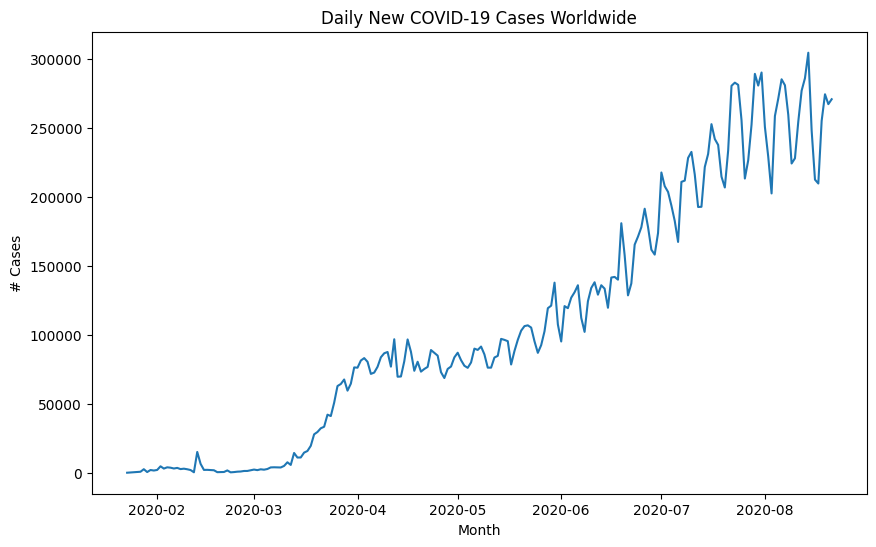

In [ ]:
# let's plot the time series

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(daily_new_cases)
ax.set_xlabel("Month")
ax.set_ylabel("# Cases")
ax.set_title("Daily New COVID-19 Cases Worldwide")

Overall, we see a general increasing trend in the number of new daily cases during the selected time period.

## 2. Stationarity Tests

Let's first try to understand whether our time series is stationary or not. Recall that a stationary time series has stable statistics, such as constant means and variances, over time. A non-stationary time series would not be very interesting to study, as it is essentially equivalent to a white noise, carrying little information.

One way of determining stationarity is to calculate some summary statistics. A rolling mean and a rolling standard deviation are the mean and the standard deviation over a rolling window of values. They both have the same length as the original time series. For a rolling window of size $k$, the $j$-th component of the rolling mean $\mu$ and the rolling standard deviation $\sigma$ is precisely defined as:

\begin{align}
\mu_{j} &= \frac{1}{\min(k, j)} \sum_{i = \max(1,j - k + 1)}^{j} x_{i} = \begin{cases}
\frac{1}{j} \sum_{i = 1}^{j} x_{i} & \text{if } j \leq k \\
\frac{1}{k} \sum_{i = j - k + 1}^{j} x_{i} & \text{if } j > k
\end{cases}
\\
\sigma_{j} &= \sqrt{\frac{1}{\min(k, j)} \sum_{i = \max(1,j - k + 1)}^{j} \left(x_{i} - \mu_{j}\right)^{2}} = \begin{cases}
\sqrt{\frac{1}{j} \sum_{i = 1}^{j} \left(x_{i} - \mu_{j}\right)^{2}} & \text{if } j \leq k \\
\sqrt{\frac{1}{k} \sum_{i = j - k + 1}^{j} \left(x_{i} - \mu_{j}\right)^{2}} & \text{if } j > k
\end{cases}
\end{align}

where $j \geq 1$.




### 2.1 Calculate the rolling mean and standard deviation of the input time series.

The size of the rolling window is governed by the argument `wd_size`.

In [ ]:
# calculate the weighted moving average

def calc_wma(ser, wd_size, weights=1):
    if isinstance(weights, int):
        weights = np.full(wd_size, weights, dtype=float)

    wma = []
    for i in range(len(ser)):
        low, high = max(0, i - wd_size + 1), i + 1
        wma.append(np.average(ser.iloc[low: high], weights=weights[-(high - low):]))
    return np.array(wma)

In [ ]:
# calculate the rolling statistics

wd_size = 7 # our window size, k
first_mmt = calc_wma(daily_new_cases, wd_size)
second_mmt = calc_wma(daily_new_cases ** 2, wd_size)

rolling_mean = first_mmt
rolling_std = np.sqrt(second_mmt - first_mmt ** 2)

Let's plot and see the rolling statistics together with the original time series. Is our time series stationary? Why or why not?

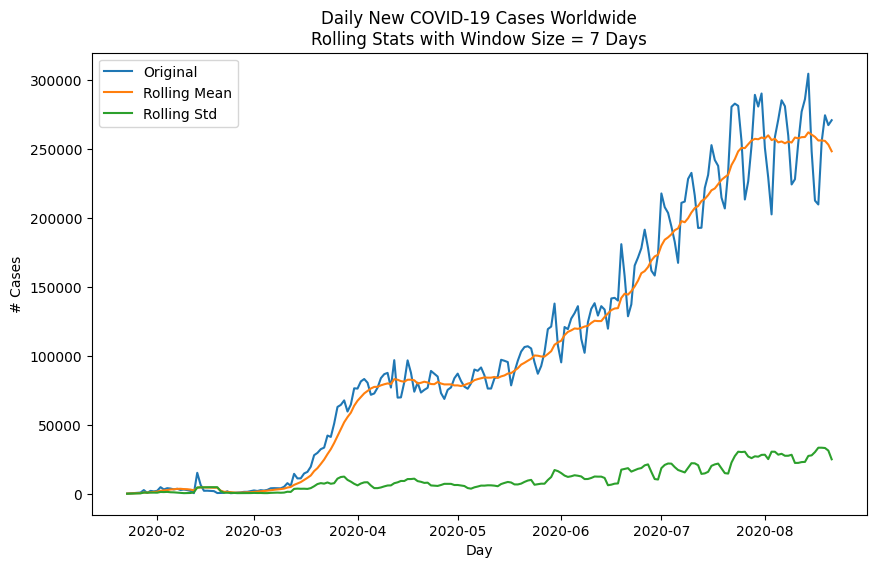

In [ ]:
# plot the time series and the rolling statistics

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(daily_new_cases, label="Original")
ax.plot(pd.Series(rolling_mean, index=daily_new_cases.index), label="Rolling Mean")
ax.plot(pd.Series(rolling_std, index=daily_new_cases.index), label="Rolling Std")

ax.set_xlabel("Day")
ax.set_ylabel("# Cases")
ax.set_title("Daily New COVID-19 Cases Worldwide\n" + f"Rolling Stats with Window Size = {wd_size} Days")
ax.legend()

In [ ]:
### YOUR CODE: try out a window size of 3 and a window size of 10
### how do the resulting trend curves compare to that above?







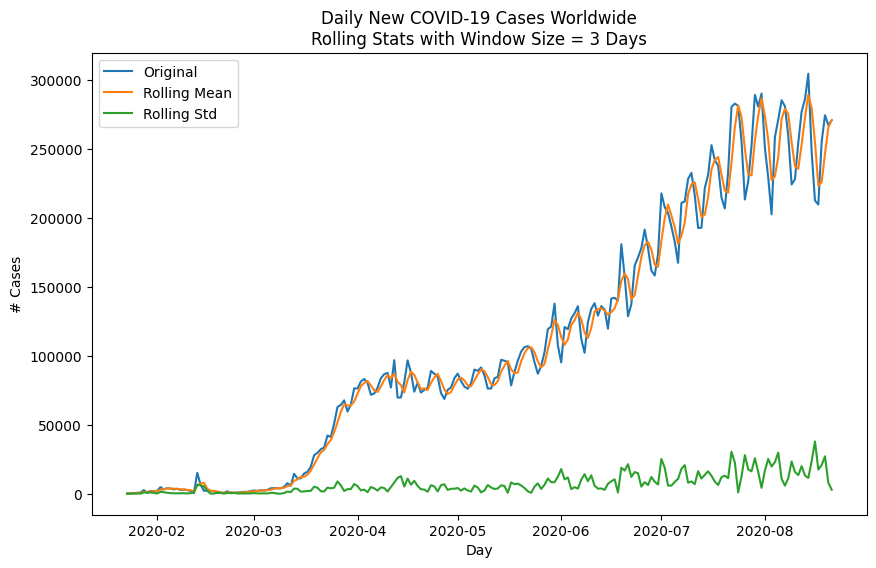

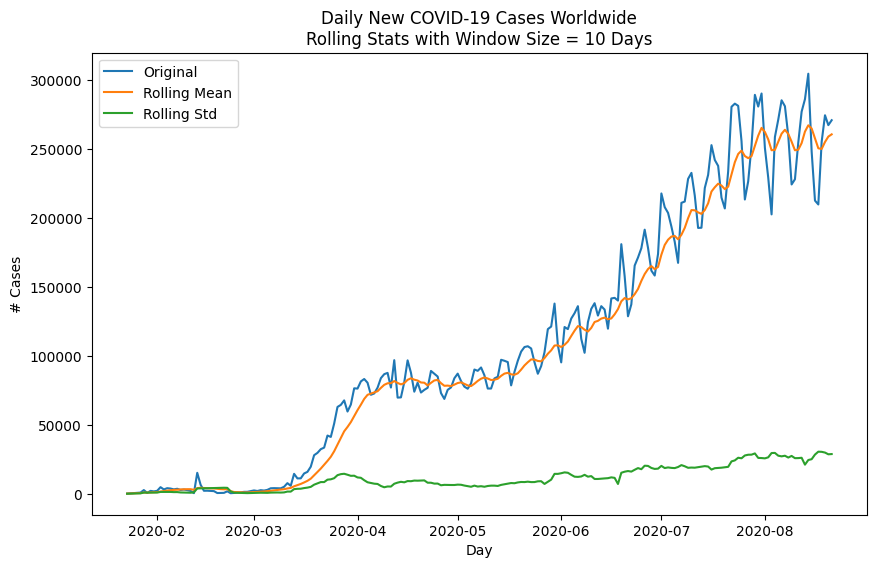

In [ ]:
# window size = 3
first_mmt_3 = calc_wma(daily_new_cases, 3)
second_mmt_3 = calc_wma(daily_new_cases ** 2, 3)

rolling_mean_3 = first_mmt_3
rolling_std_3 = np.sqrt(second_mmt_3 - first_mmt_3 ** 2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(daily_new_cases, label="Original")
ax.plot(pd.Series(rolling_mean_3, index=daily_new_cases.index), label="Rolling Mean")
ax.plot(pd.Series(rolling_std_3, index=daily_new_cases.index), label="Rolling Std")

ax.set_xlabel("Day")
ax.set_ylabel("# Cases")
ax.set_title("Daily New COVID-19 Cases Worldwide\n" + f"Rolling Stats with Window Size = 3 Days")
ax.legend()

# window size = 10
first_mmt_10 = calc_wma(daily_new_cases, 10)
second_mmt_10 = calc_wma(daily_new_cases ** 2, 10)

rolling_mean_10 = first_mmt_10
rolling_std_10 = np.sqrt(second_mmt_10 - first_mmt_10 ** 2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(daily_new_cases, label="Original")
ax.plot(pd.Series(rolling_mean_10, index=daily_new_cases.index), label="Rolling Mean")
ax.plot(pd.Series(rolling_std_10, index=daily_new_cases.index), label="Rolling Std")

ax.set_xlabel("Day")
ax.set_ylabel("# Cases")
ax.set_title("Daily New COVID-19 Cases Worldwide\n" + f"Rolling Stats with Window Size = 10 Days")
ax.legend()

### 2.2 Log Return

Now let's see whether the *log return* of our time series is stationary.

In [ ]:
log_ret = np.log(daily_new_cases).diff().dropna()

# calculate the rolling statistics
wd_size = 7 # our window size, k
first_mmt = calc_wma(log_ret, wd_size)
second_mmt = calc_wma(log_ret ** 2, wd_size)

rolling_mean = first_mmt
rolling_std = np.sqrt(second_mmt - first_mmt ** 2)

This time let's plot and see the rolling statistics together with the log returns. Are the log returns of our time series stationary? Why or why not?

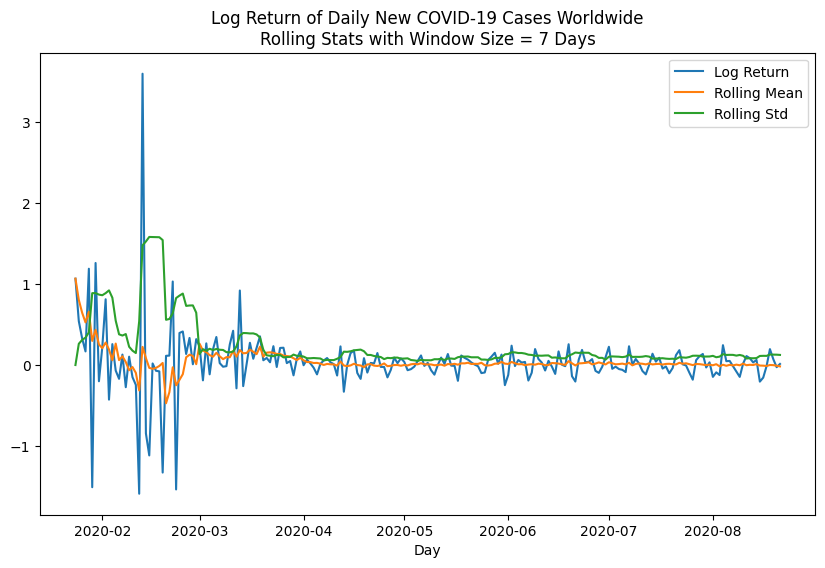

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(log_ret, label="Log Return")
ax.plot(pd.Series(rolling_mean, index=log_ret.index), label="Rolling Mean")
ax.plot(pd.Series(rolling_std, index=log_ret.index), label="Rolling Std")

ax.set_xlabel("Day")
ax.set_title("Log Return of Daily New COVID-19 Cases Worldwide\n" + f"Rolling Stats with Window Size = {wd_size} Days")
ax.legend()

In [ ]:
### YOUR CODE: try out a window size of 3 and a window size of 10
### how do the resulting trend curves compare to that above?






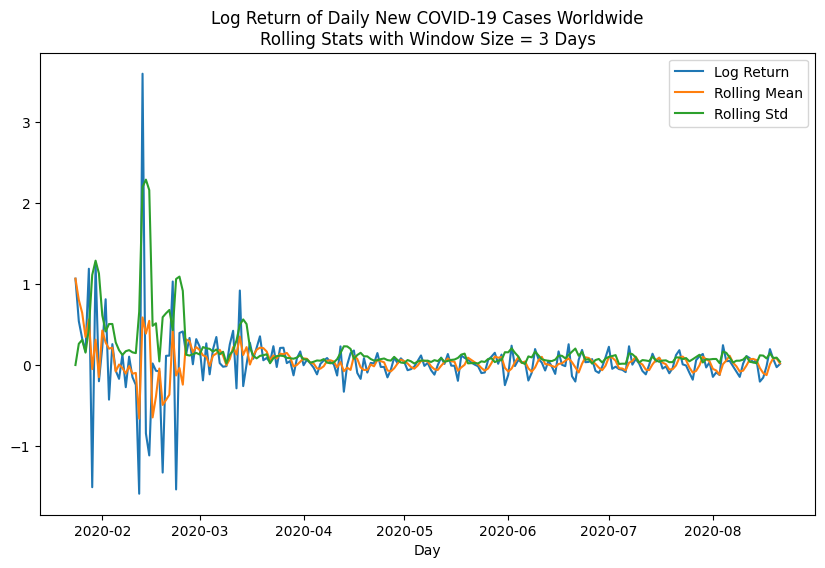

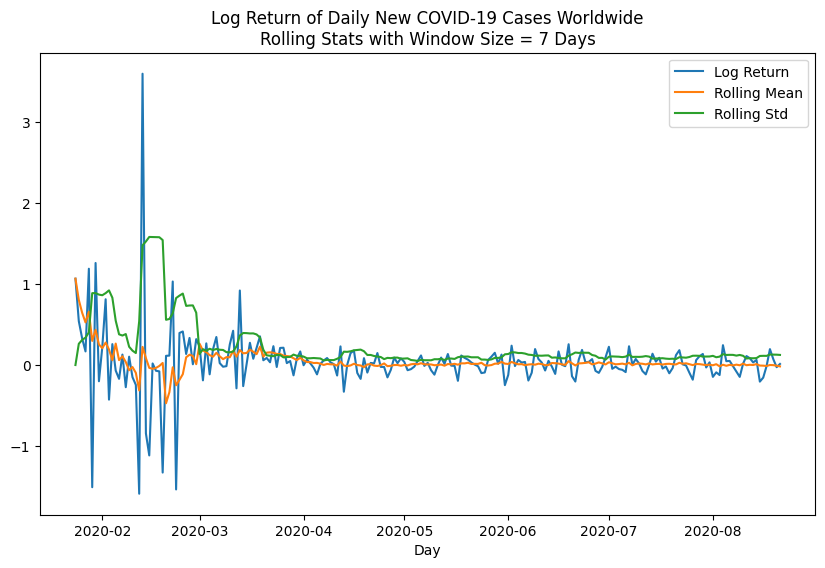

In [ ]:
# window size = 3
first_mmt_3 = calc_wma(log_ret, 3)
second_mmt_3 = calc_wma(log_ret ** 2, 3)

rolling_mean_3 = first_mmt_3
rolling_std_3 = np.sqrt(second_mmt_3 - first_mmt_3 ** 2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(log_ret, label="Log Return")
ax.plot(pd.Series(rolling_mean_3, index=log_ret.index), label="Rolling Mean")
ax.plot(pd.Series(rolling_std_3, index=log_ret.index), label="Rolling Std")

ax.set_xlabel("Day")
ax.set_title("Log Return of Daily New COVID-19 Cases Worldwide\n" + f"Rolling Stats with Window Size = 3 Days")
ax.legend()

# window size = 7
first_mmt_7 = calc_wma(log_ret, 7)
second_mmt_7 = calc_wma(log_ret ** 2, 7)

rolling_mean_7 = first_mmt_7
rolling_std_7 = np.sqrt(second_mmt_7 - first_mmt_7 ** 2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(log_ret, label="Log Return")
ax.plot(pd.Series(rolling_mean_7, index=log_ret.index), label="Rolling Mean")
ax.plot(pd.Series(rolling_std_7, index=log_ret.index), label="Rolling Std")

ax.set_xlabel("Day")
ax.set_title("Log Return of Daily New COVID-19 Cases Worldwide\n" + f"Rolling Stats with Window Size = 7 Days")
ax.legend()

### 2.3 Augmented Dickey-Fuller Test


Yet another way of determining stationarity would be to use a statistical test, such as the [Augmented Dickey-Fuller unit root test](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test). The null hypothesis is usually that the time series is non-stationary. A $p$-value less than $0.05$ would lead to the conclusion that the time series is stationary, although some [scientists have rised up against this magic numer](https://www.nature.com/articles/d41586-019-00857-9)!

In [ ]:
# An example of performing an Augmented Dickey-Fuller unit root test

from statsmodels.tsa.stattools import adfuller

_, pval, *_ = adfuller(daily_new_cases)
print(f"p-value: {pval}")

p-value: 0.6765852511544093


In [ ]:
### YOUR CODE: perform an Augmented Dickey-Fuller unit root test on the rolling mean and rolling standard deviation,
### as well as the log return of the daily new cases, and print out the p-values





In [ ]:
_, pval, *_ = adfuller(rolling_mean)
print(f"p-value: {pval}")

_, pval, *_ = adfuller(rolling_std)
print(f"p-value: {pval}")

_, pval, *_ = adfuller(log_ret)
print(f"p-value: {pval}")

p-value: 0.0028148392452574046
p-value: 0.39791285825118955
p-value: 0.012871009572682675


## 3. Autocorrelations

Observations in a time series are often not isolated but rather correlated. That is, there might be a correlation between an observation $y_{t}$ and another observation $y_{t - k}$ that is $k$ time steps (or *lags*) earlier. (Partial) autocorrelations precisely capture this idea.

### 3.1 Autocorrelation Function (ACF)

The autocorrelation function (ACF) is a function of the lag $k$ that measures the correlation between the time series and a *lagged* version of itself.

In [ ]:
# Calculate the ACF
from statsmodels.tsa.stattools import acf

max_lag = 30 # the maximum lag to consider

acf_ret = acf(daily_new_cases, nlags=max_lag)


Text(0, 0.5, 'Correlation')

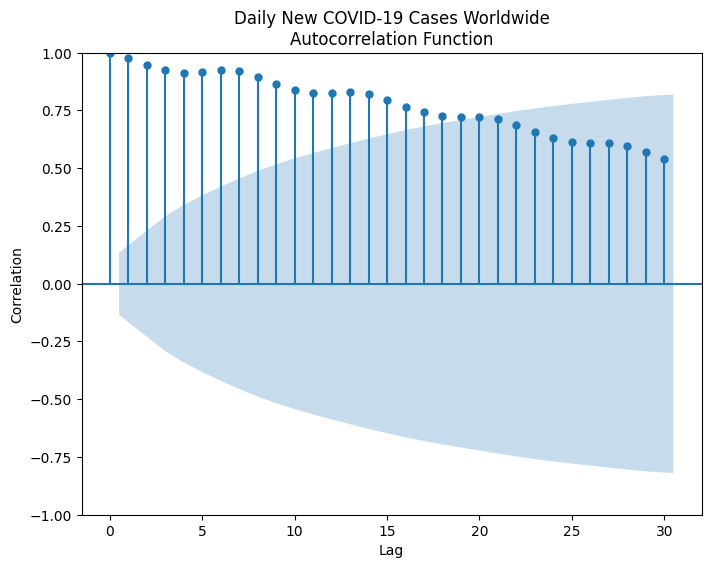

In [ ]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

plot_acf(daily_new_cases, ax, lags=max_lag, title="Daily New COVID-19 Cases Worldwide\nAutocorrelation Function")
ax.set_xlabel(r"Lag")
ax.set_ylabel(r"Correlation")

Text(0, 0.5, 'Correlation')

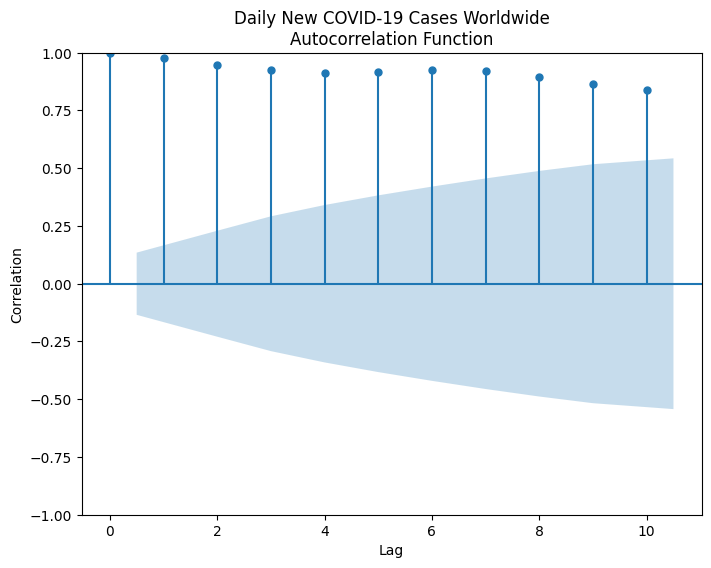

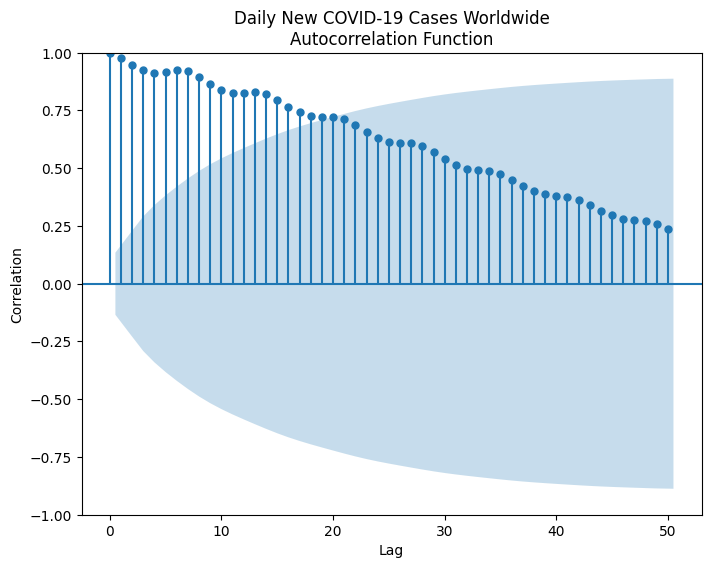

In [ ]:
### YOUR CODE: try out a max lag of 10 and a max log of 50
### how do the resulting trend curves compare to that above?

# max_lag = 10
acf_ret = acf(daily_new_cases, nlags=10)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_acf(daily_new_cases, ax, lags=10, title="Daily New COVID-19 Cases Worldwide\nAutocorrelation Function")
ax.set_xlabel(r"Lag")
ax.set_ylabel(r"Correlation")

# max_lag = 50
acf_ret = acf(daily_new_cases, nlags=50)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_acf(daily_new_cases, ax, lags=50, title="Daily New COVID-19 Cases Worldwide\nAutocorrelation Function")
ax.set_xlabel(r"Lag")
ax.set_ylabel(r"Correlation")

### 3.2 Partial Autocorrelation Function (PACF)

The partial autocorrelation function (PACF) is a function of the lag $k$ that measures the correlation between the time series and a *lagged* version of itself, after controlling for the values of the time series at all shorter lags.

In [ ]:
# Calculate the PACF
from statsmodels.tsa.stattools import pacf

max_lag = 30 # the maximum lag to consider
pacf_ret = pacf(daily_new_cases, nlags=max_lag)

Text(0, 0.5, 'Correlation')

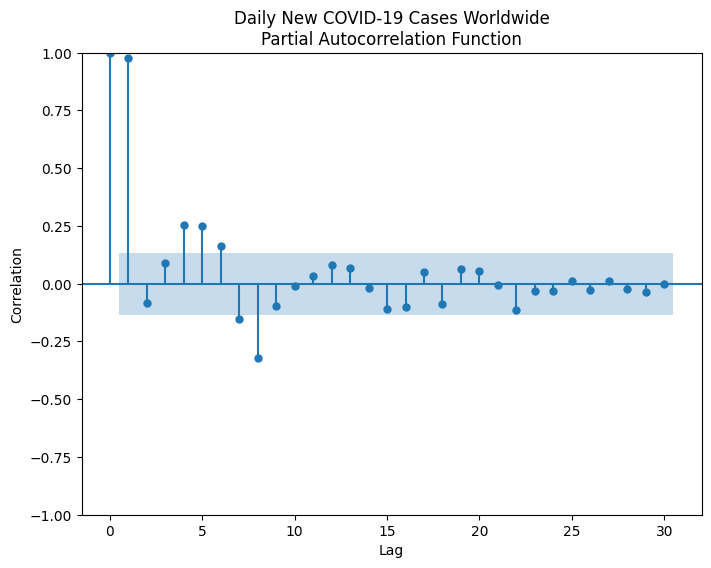

In [ ]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

plot_pacf(daily_new_cases, ax, lags=max_lag, title="Daily New COVID-19 Cases Worldwide\nPartial Autocorrelation Function")
ax.set_xlabel(r"Lag")
ax.set_ylabel(r"Correlation")

In [ ]:
### YOUR CODE: try out a max lag of 10 and a max lag of 50
### how do the resulting trend curves compare to that above?



Text(0, 0.5, 'Correlation')

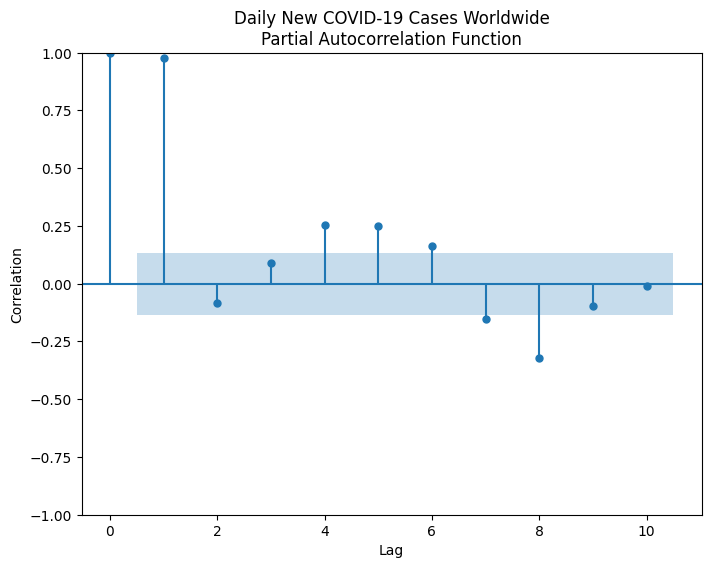

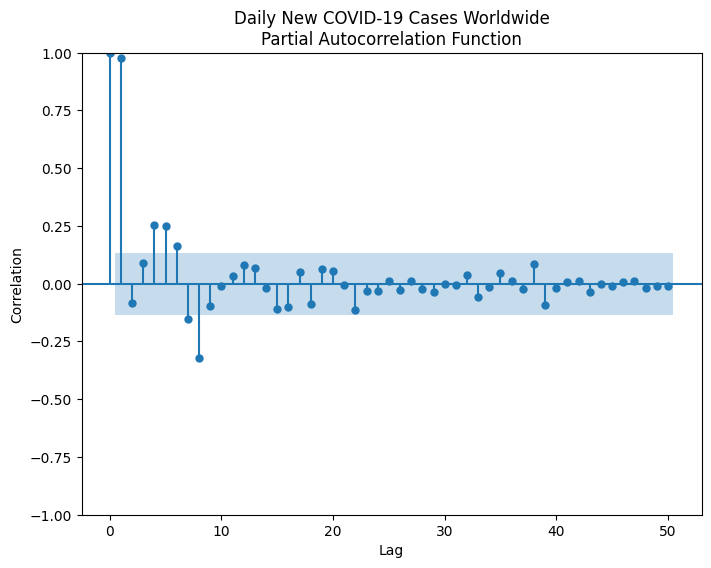

In [ ]:
# max_lag = 10
pacf_ret = pacf(daily_new_cases, nlags=10)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_pacf(daily_new_cases, ax, lags=10, title="Daily New COVID-19 Cases Worldwide\nPartial Autocorrelation Function")
ax.set_xlabel(r"Lag")
ax.set_ylabel(r"Correlation")

# max_lag = 50
pacf_ret = pacf(daily_new_cases, nlags=50)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_pacf(daily_new_cases, ax, lags=50, title="Daily New COVID-19 Cases Worldwide\nPartial Autocorrelation Function")
ax.set_xlabel(r"Lag")
ax.set_ylabel(r"Correlation")

# **Relationship between ACF and PACF in AR model (NOT REQUIRED)**
- refer to http://www-stat.wharton.upenn.edu/~steele/Courses/956/ResourceDetails/YWSourceFiles/YW-Eshel.pdf

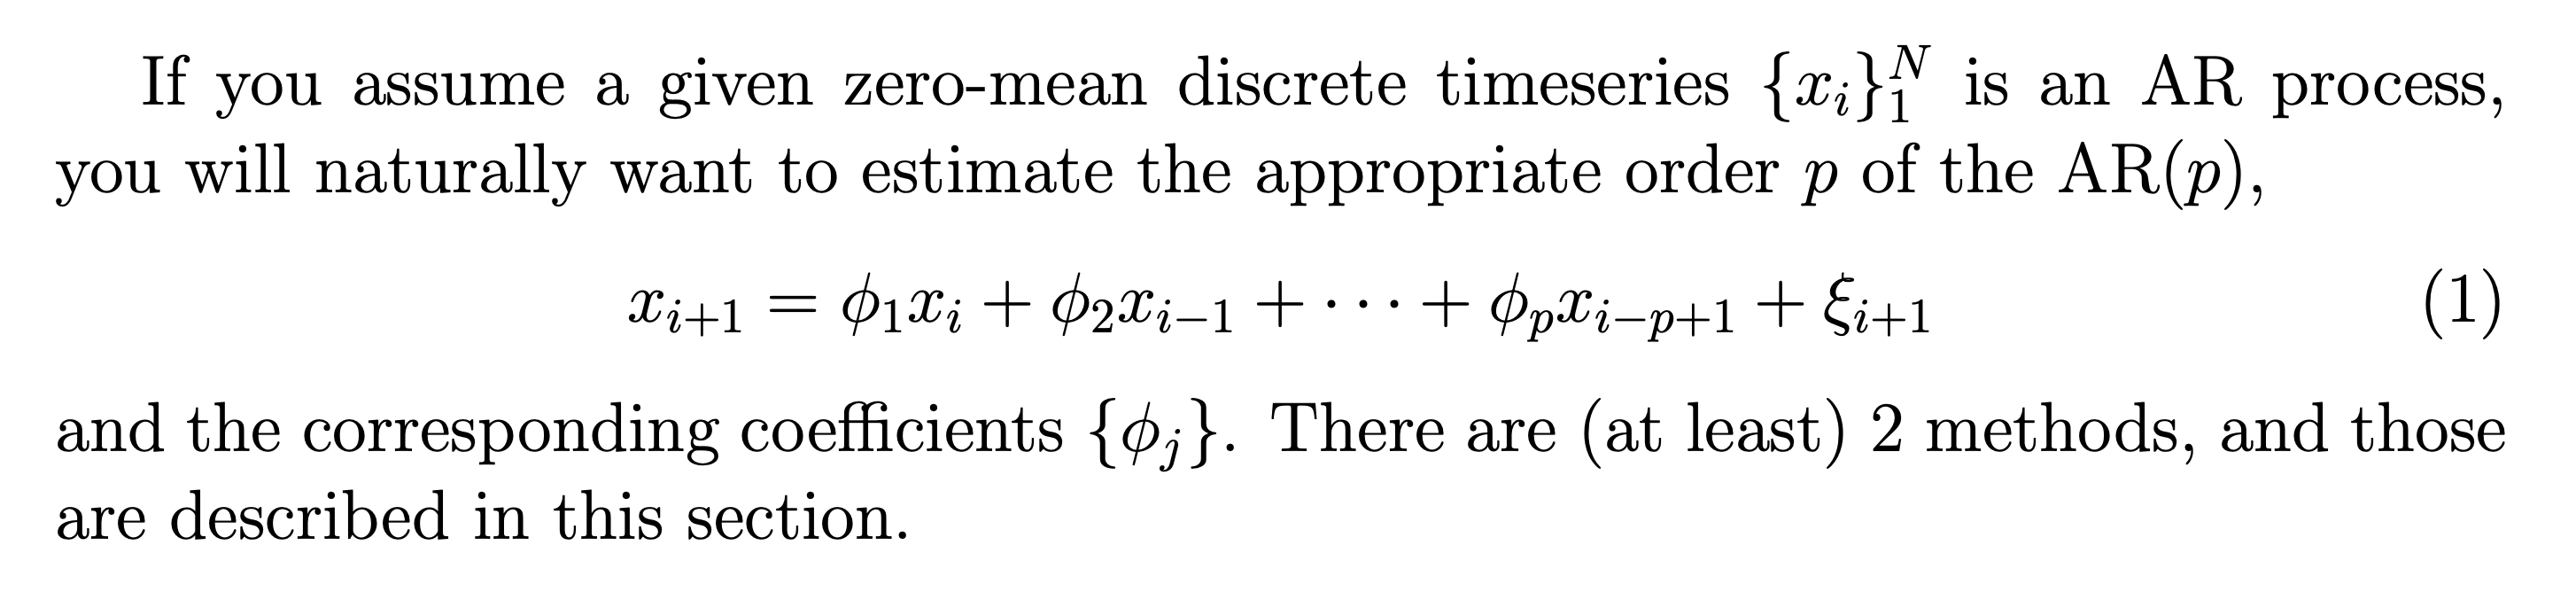

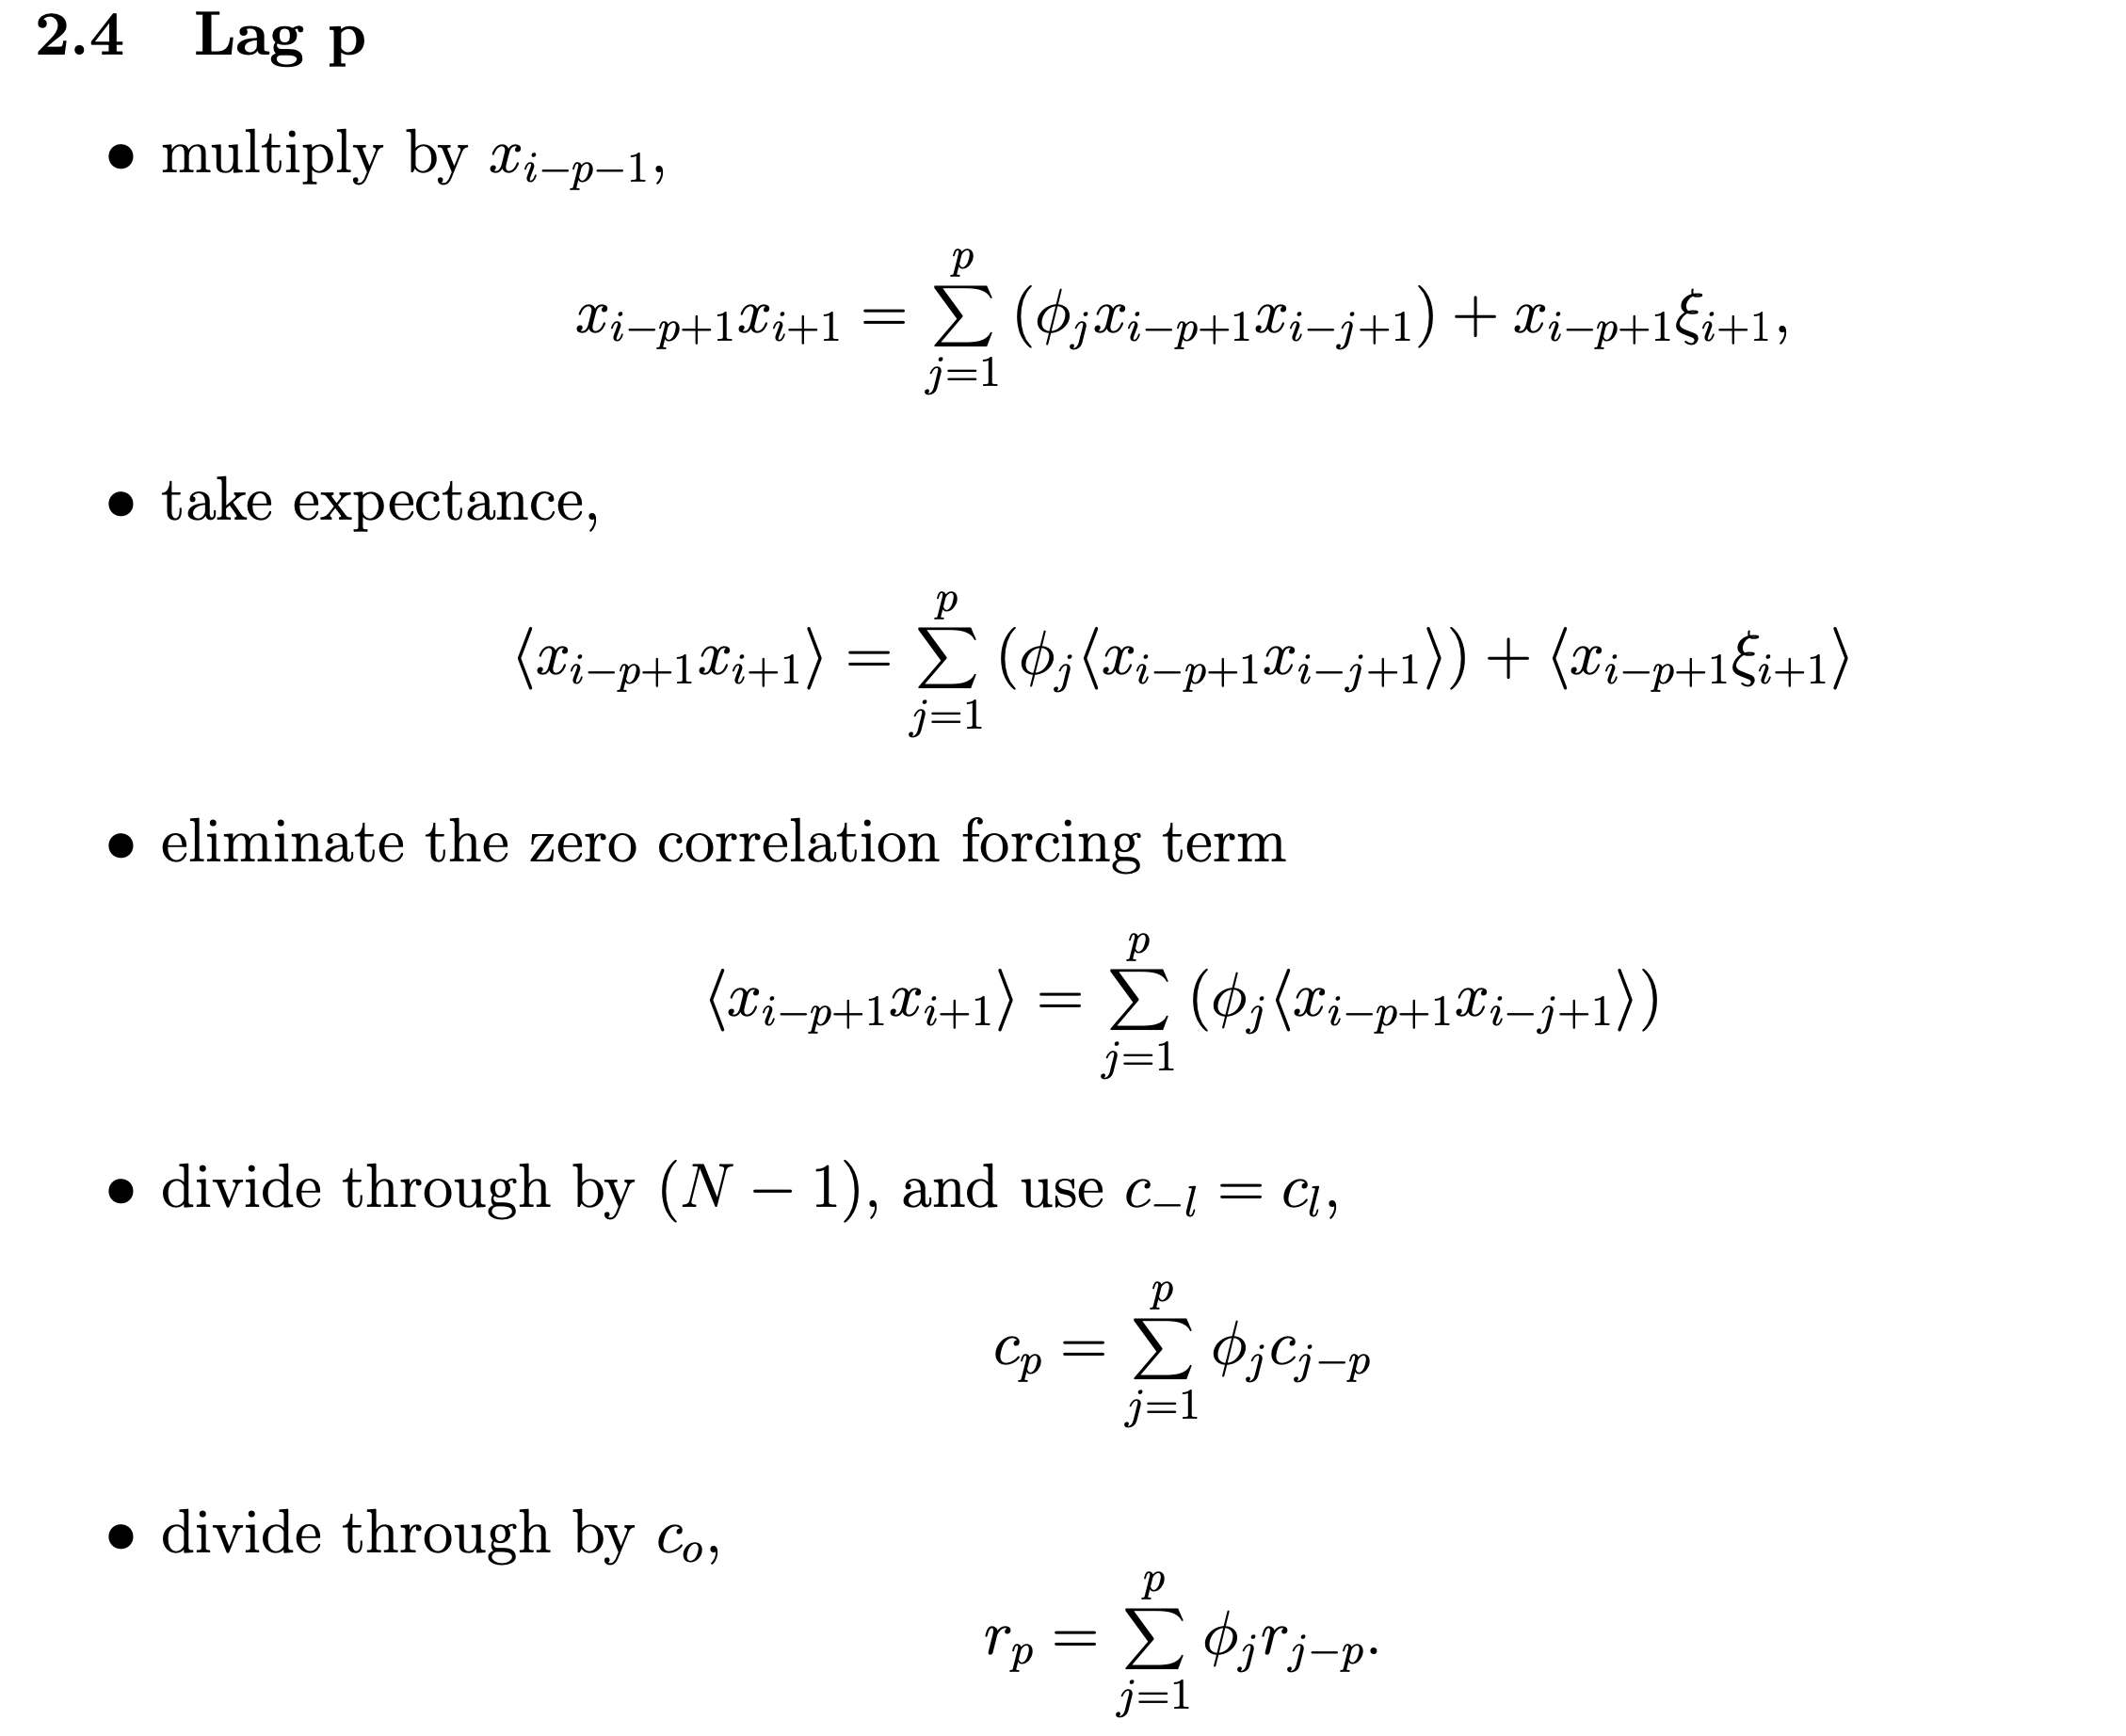

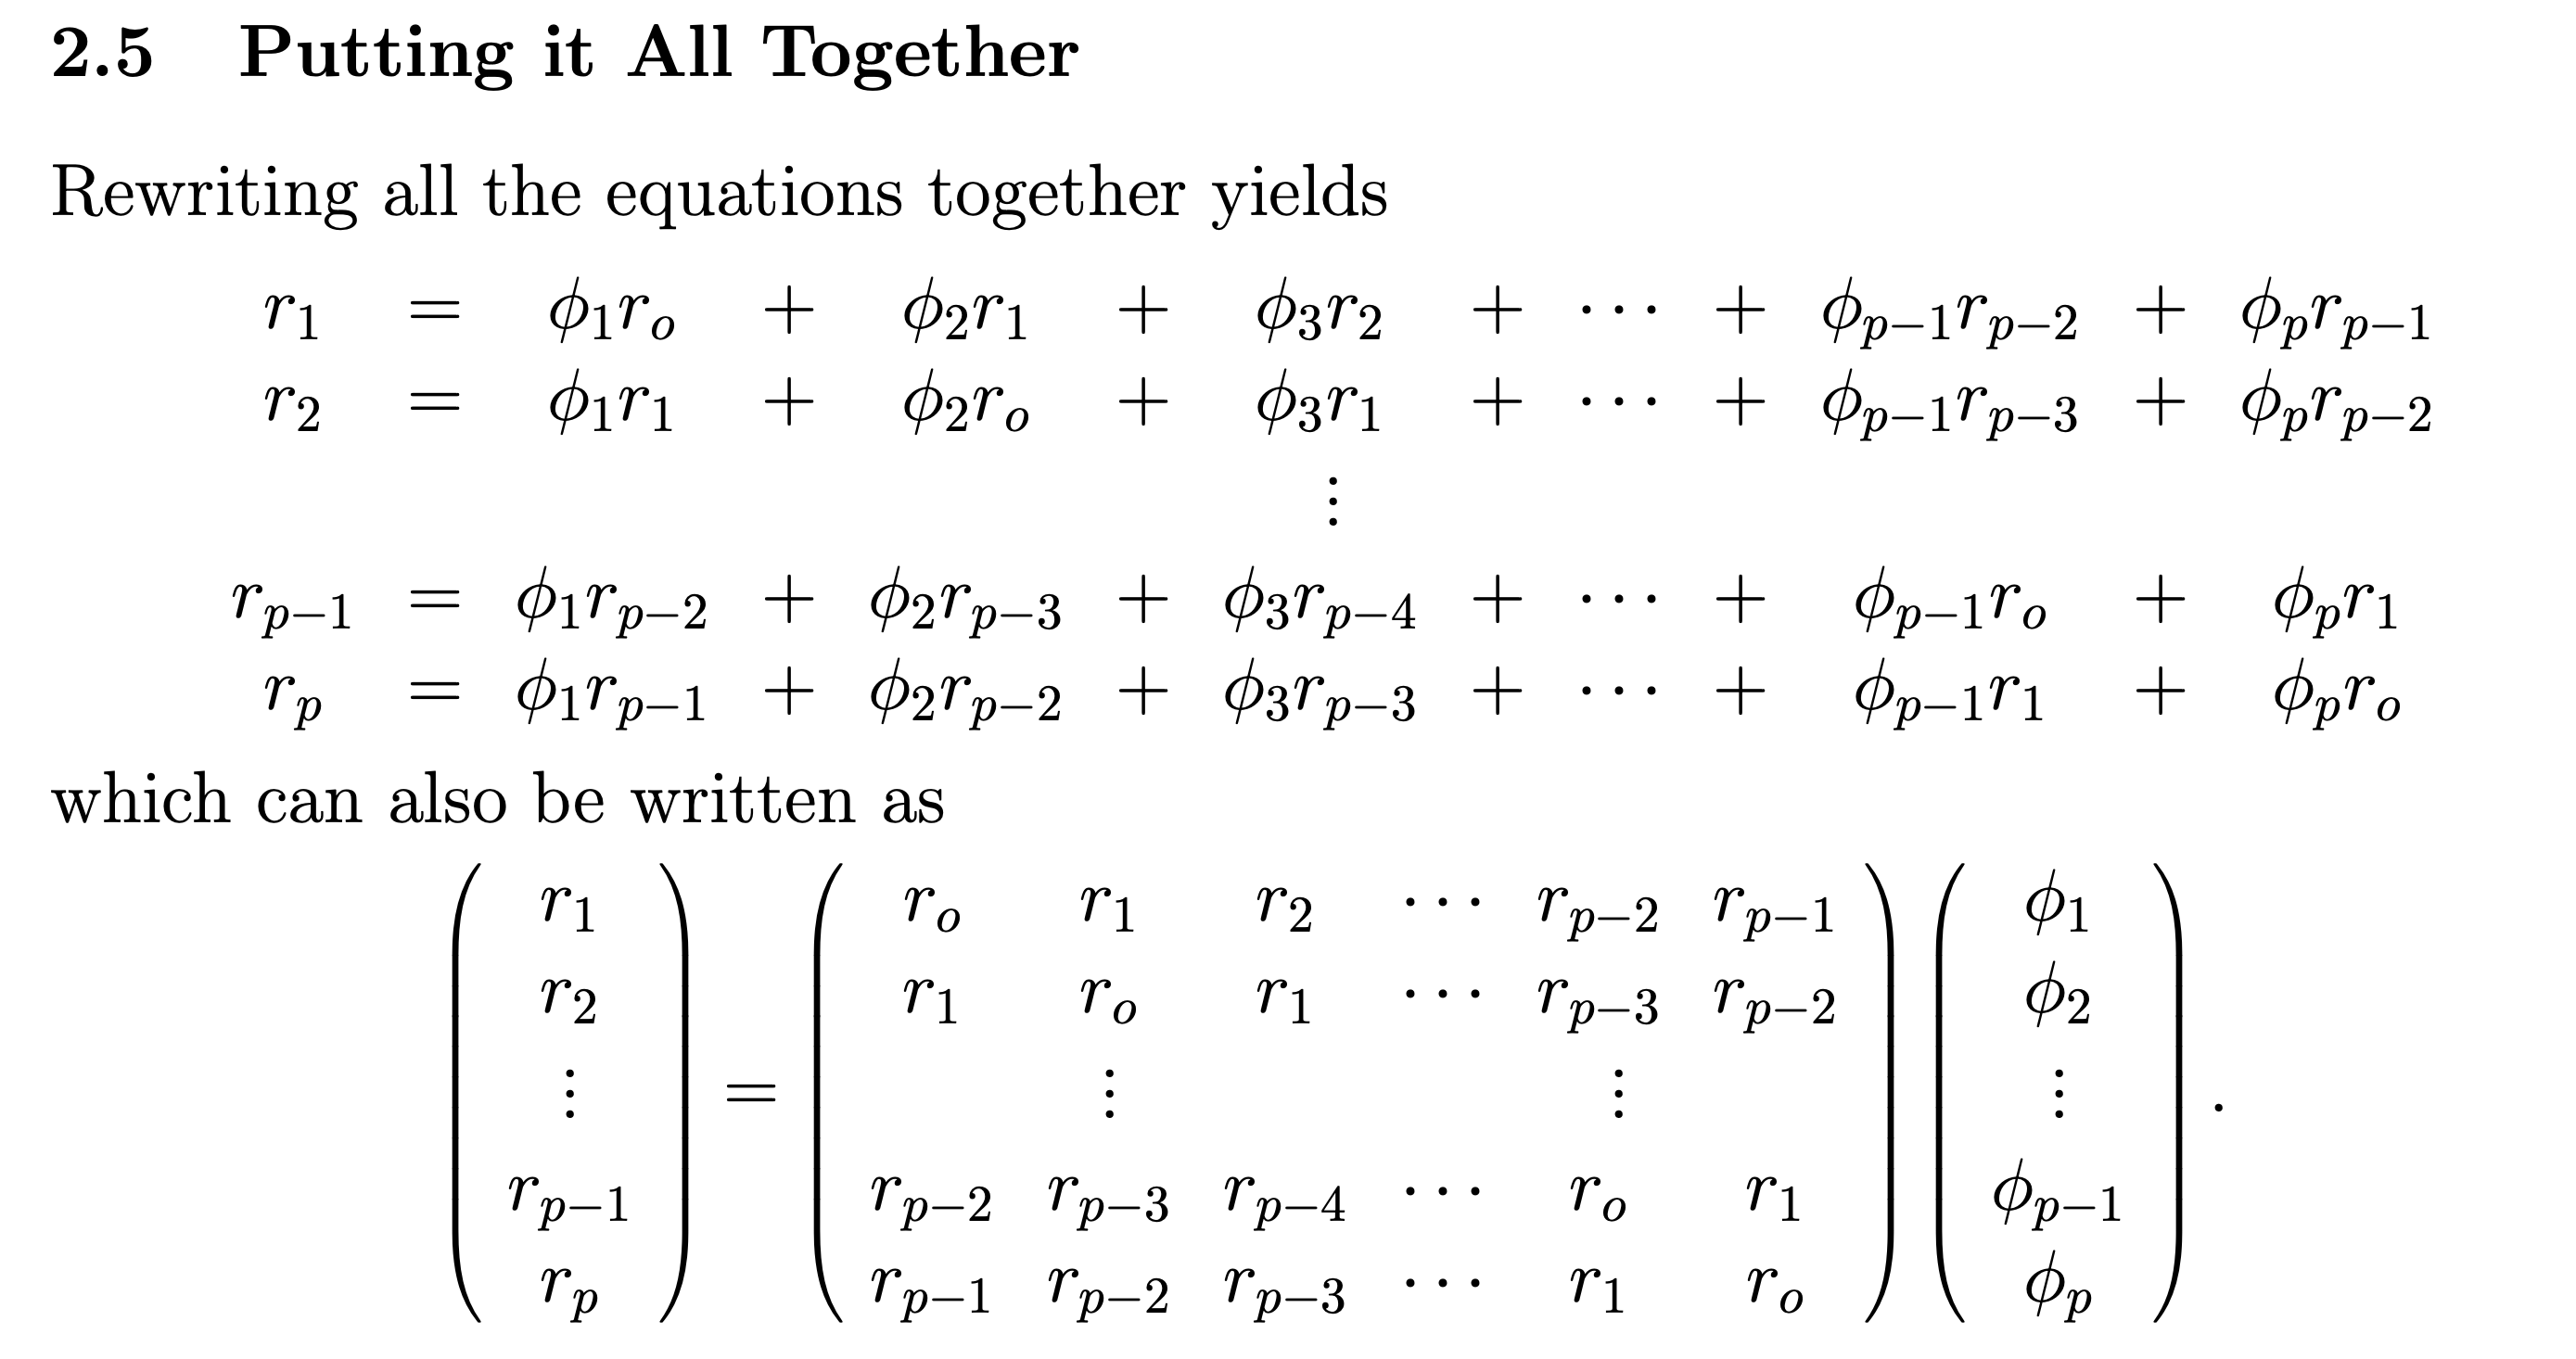

- AR model: PACF
- MA model: ACF
- ARMA model: EACF
- VARMA: https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_varmax.html#Example-2:-VMA

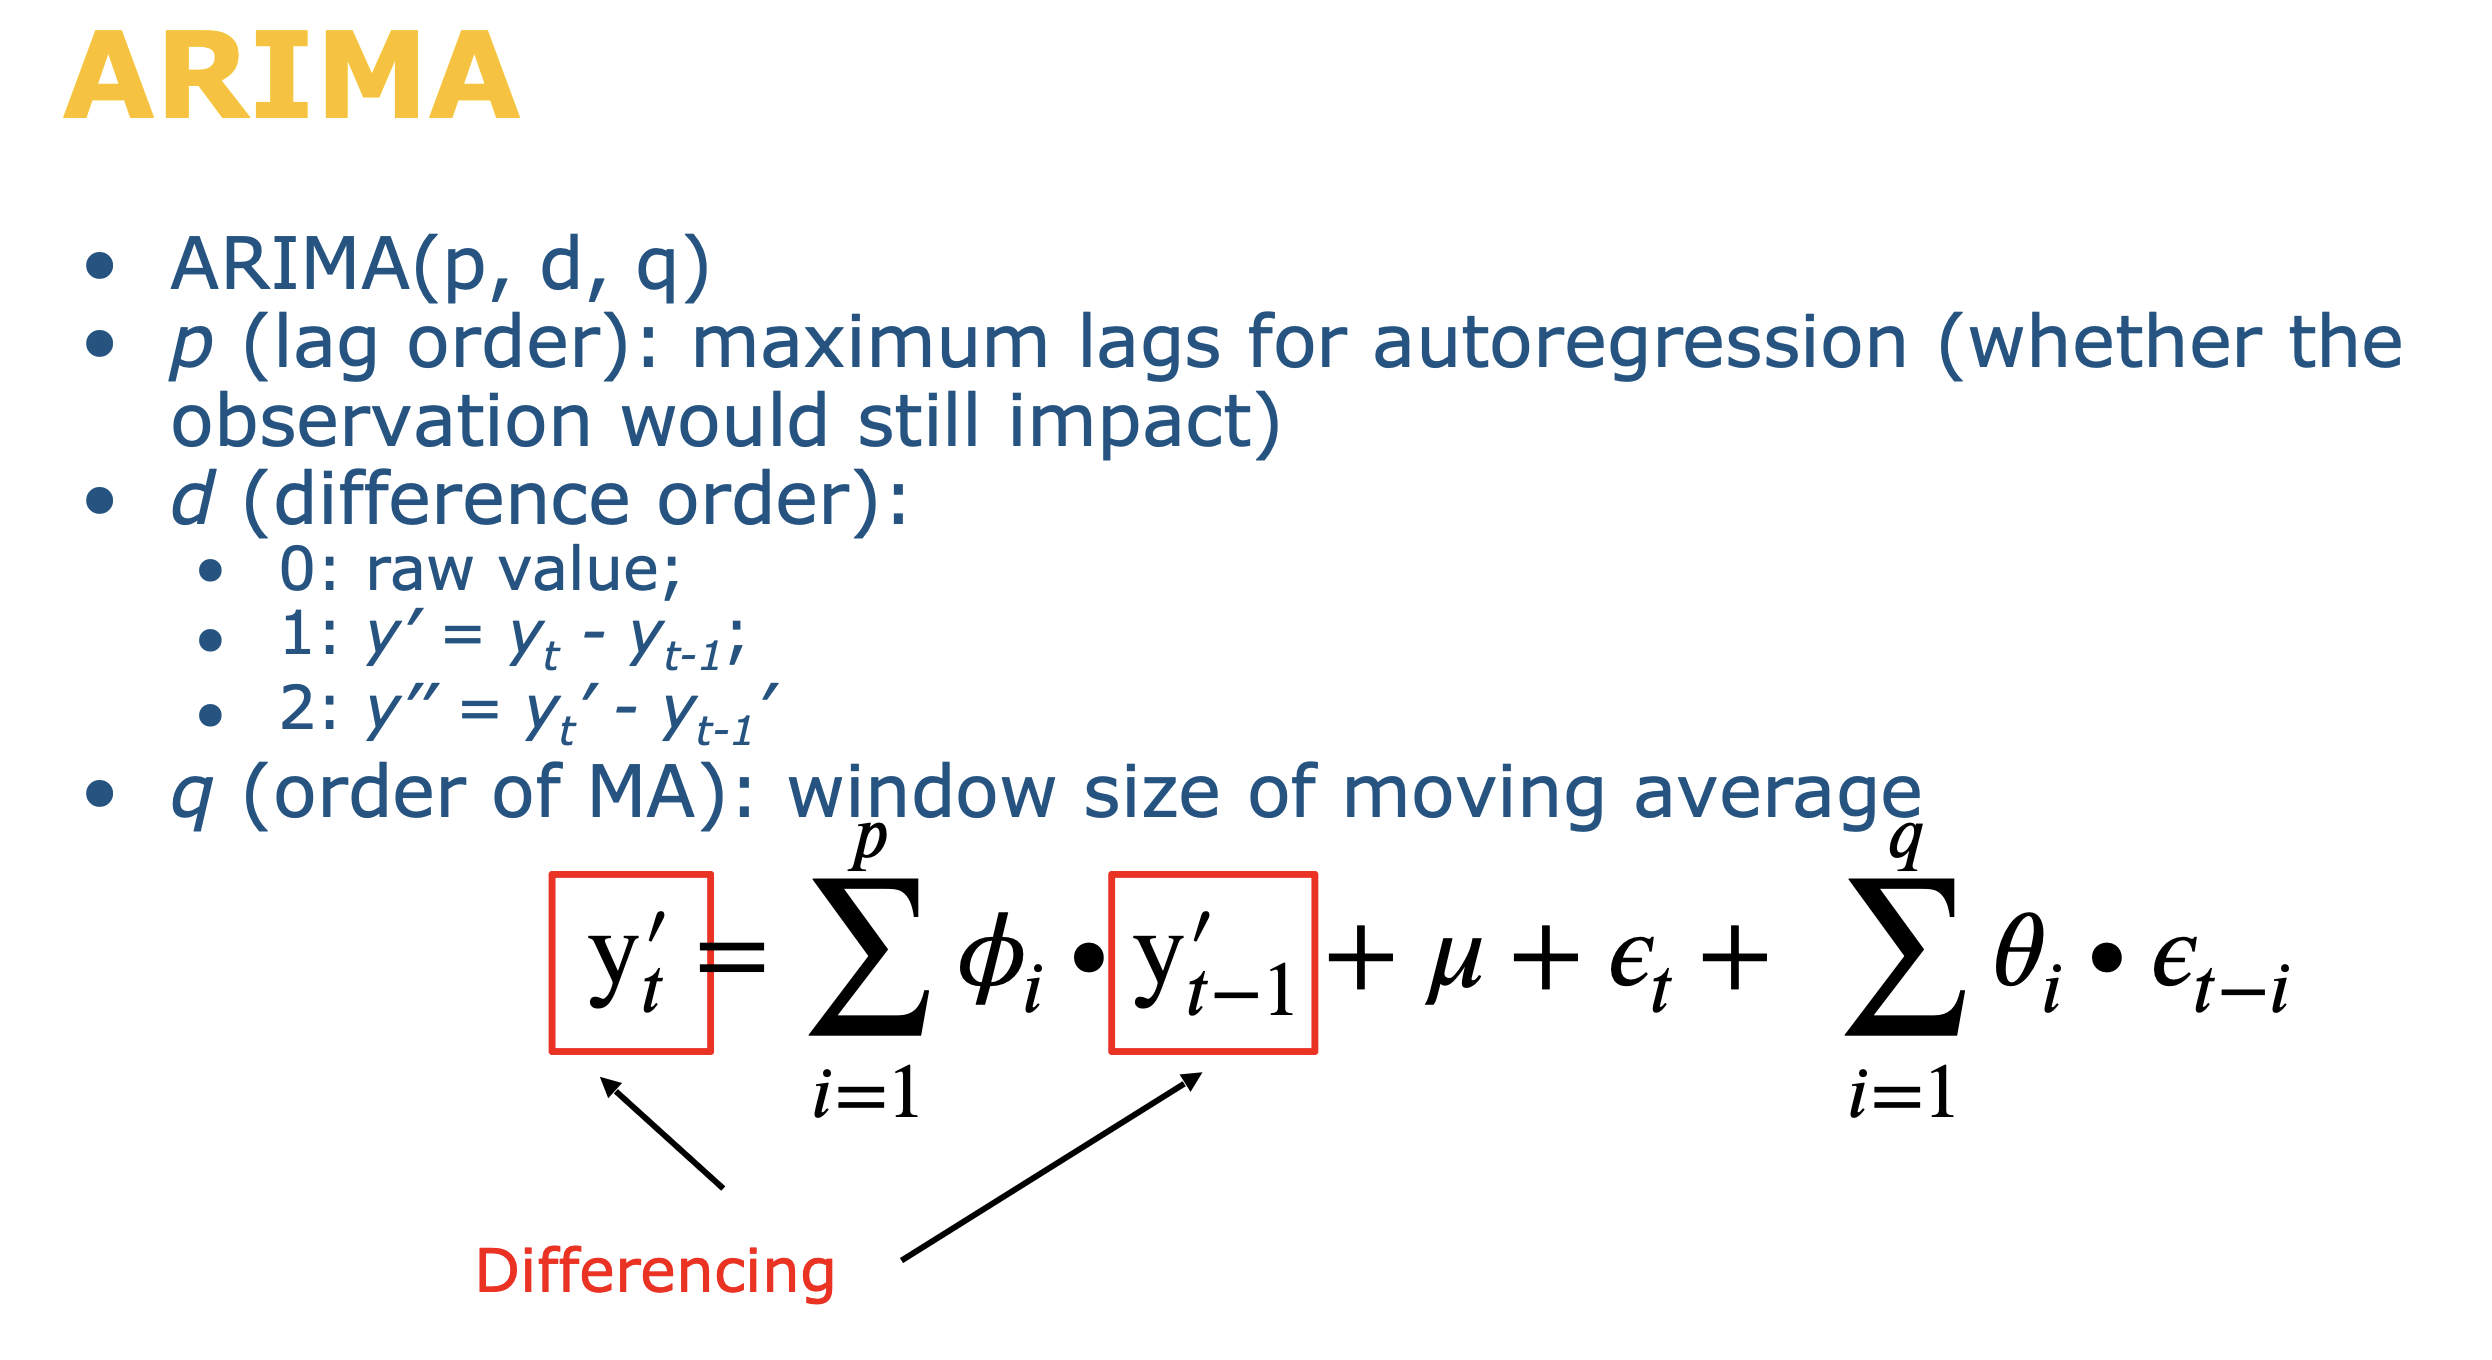

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
def adf_test_func(series,column_name):
    print(f'Results of DF test for column: {column_name}')
    dftest = adfuller(series,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Values(%s)'%key] = value
    print(dfoutput)
    if dftest[1]<=0.05:
        print('Conclusion: ----->')
        print('Reject the null hypothesis')
        print('Data is stationary')
    else:
        print('Conclusion: ----->')
        print('Fail to reject the null hypothesis')
        print('Data is non-stationary')

In [ ]:
adf_test_func(log_ret, "log daily new cases")

Results of DF test for column: log daily new cases
Test Statistic                  -3.347836
p-value                          0.012871
No Lags Used                    13.000000
Number of Observations Used    197.000000
Critical Values(1%)             -3.463987
Critical Values(5%)             -2.876326
Critical Values(10%)            -2.574652
dtype: float64
Conclusion: ----->
Reject the null hypothesis
Data is stationary


In [ ]:
n = len(log_ret)
train_diff, test_diff = log_ret[:-20], log_ret[-20:]

In [ ]:
for i in range(1,20):
    model = AutoReg(train_diff, i)
    results = model.fit()
    print(f"order:{i},aic={results.aic},bic={results.bic}")

order:1,aic=182.2459532831212,bic=191.98702549960265
order:2,aic=169.34919259676212,bic=182.3161806570007
order:3,aic=165.97418878032255,bic=182.1563985944723
order:4,aic=164.66823245885377,bic=184.05488415998127
order:5,aic=149.17045136144608,bic=171.7506780774385
order:6,aic=142.30872180862298,bic=168.07156840924958
order:7,aic=140.69058357791636,bic=169.62500539639723
order:8,aic=141.68243722895517,bic=173.7772987573694
order:9,aic=125.24724838541898,bic=160.49132194326373
order:10,aic=121.58131795320082,bic=159.96328232839073
order:11,aic=123.81255293777639,bic=165.32099199934913
order:12,aic=126.00941716037651,bic=170.63281844214708
order:13,aic=125.45517190030988,bic=173.18192515469116
order:14,aic=108.63398873976405,bic=159.45238446094532
order:15,aic=110.26746831220099,bic=164.16569622784957
order:16,aic=104.7411961802042,bic=161.70734371082744
order:17,aic=105.40784740893656,bic=165.42989809401263
order:18,aic=101.41433965015284,bic=164.48017154010844
order:19,aic=100.55826786

In [ ]:
best_model = AutoReg(train_diff, 14)
res = best_model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  191
Model:                    AutoReg(14)   Log Likelihood                 -38.317
Method:               Conditional MLE   S.D. of innovations              0.300
Date:                Wed, 08 Nov 2023   AIC                            108.634
Time:                        00:41:15   BIC                            159.452
Sample:                    02-07-2020   HQIC                           129.244
                         - 08-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0256      0.025      1.017      0.309      -0.024       0.075
y.L1          -0.4545      0.071     -6.381      0.000      -0.594      -0.315
y.L2          -0.2651      0.079     -3.358      0.0

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

def evaluation_func(res, y_true):
    y_pred = res.forecast(len(y_true))
    y_true = np.exp(train_diff.sum() + y_true.cumsum())
    y_pred = np.exp(train_diff.sum() + y_pred.cumsum())
    mae = mean_absolute_error(y_true, y_pred)
    msre = mean_squared_error(y_true, y_pred)**0.5
    mslre = mean_squared_log_error(y_true, y_pred)**0.5
    print("MAE:", mae)
    print("MSE:", msre)
    print("MSLE:", mslre)
    plt.figure(figsize=(12, 5))
    plt.plot(y_true)
    plt.plot(y_pred)
    plt.legend(["true", "pred"])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


MAE: 694.1616987964429
MSE: 793.6030538921746
MSLE: 0.2707598922302668


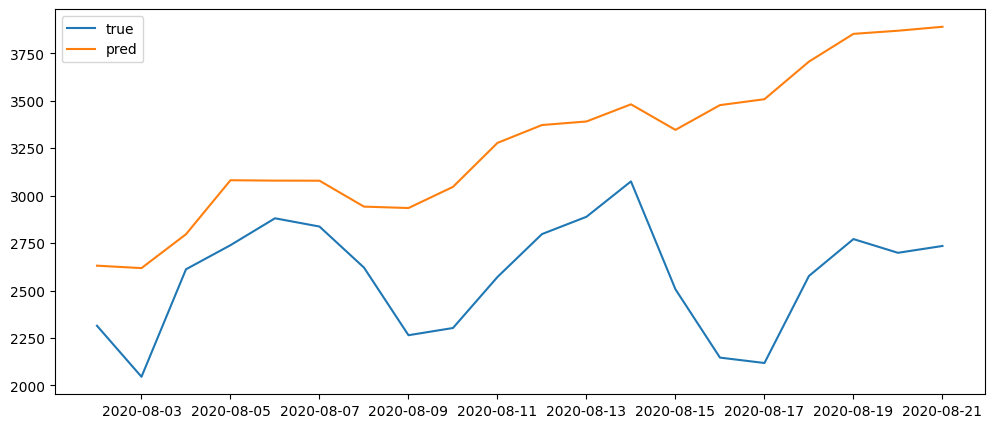

In [ ]:
evaluation_func(res, test_diff)